In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
data = pd.read_csv("Tweets.csv")
data.head(5)

,text,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,@VirginAmerica What @dhepburn said.,NaN,NaN,NaN
1,@VirginAmerica plus you've added commercials t...,NaN,NaN,NaN
2,@VirginAmerica I didn't today... Must mean I n...,NaN,NaN,NaN
3,@VirginAmerica it's really aggressive to blast...,NaN,NaN,NaN
4,@VirginAmerica and it's a really big bad thing...,NaN,NaN,NaN


In [23]:
 
data.head()

,text,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,@VirginAmerica What @dhepburn said.,NaN,NaN,NaN
1,@VirginAmerica plus you've added commercials t...,NaN,NaN,NaN
2,@VirginAmerica I didn't today... Must mean I n...,NaN,NaN,NaN
3,@VirginAmerica it's really aggressive to blast...,NaN,NaN,NaN
4,@VirginAmerica and it's a really big bad thing...,NaN,NaN,NaN


# Number of Words

In [24]:
data['word_count'] = data['text'].apply(lambda x: len(str(x).split(" ")))
data[['text','word_count']].head()

,text,word_count
0,@VirginAmerica What @dhepburn said.,4
1,@VirginAmerica plus you've added commercials t...,9
2,@VirginAmerica I didn't today... Must mean I n...,12
3,@VirginAmerica it's really aggressive to blast...,17
4,@VirginAmerica and it's a really big bad thing...,10


# Number of characters

In [25]:
data['char_count'] = data['text'].str.len() ## this also includes spaces
data[['text','char_count']].head()

,text,char_count
0,@VirginAmerica What @dhepburn said.,35
1,@VirginAmerica plus you've added commercials t...,72
2,@VirginAmerica I didn't today... Must mean I n...,71
3,@VirginAmerica it's really aggressive to blast...,126
4,@VirginAmerica and it's a really big bad thing...,55


# Basic Pre-processing

In [26]:
data = data[["text"]]
data

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...
...,...
14635,@AmericanAir thank you we got on a different f...
14636,@AmericanAir leaving over 20 minutes Late Flig...
14637,@AmericanAir Please bring American Airlines to...
14638,"@AmericanAir you have my money, you change my ..."


In [27]:
data = data.dropna()

In [28]:
#remove lowercase
data['text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['text'].head()

0                  @virginamerica what @dhepburn said.
1    @virginamerica plus you've added commercials t...
2    @virginamerica i didn't today... must mean i n...
3    @virginamerica it's really aggressive to blast...
4    @virginamerica and it's a really big bad thing...
Name: text, dtype: object

In [29]:
#Removing Punctuation
data['text'] = data['text'].str.replace('[^\w\s]','')
data['text'].head()

0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercials to ...
2    virginamerica i didnt today must mean i need t...
3    virginamerica its really aggressive to blast o...
4    virginamerica and its a really big bad thing a...
Name: text, dtype: object

In [30]:
#Removal of Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['text'].head()

0                          virginamerica dhepburn said
1    virginamerica plus youve added commercials exp...
2    virginamerica didnt today must mean need take ...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: text, dtype: object

In [31]:
#Common word removal
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:10]
freq

united          4143
flight          3873
usairways       3051
americanair     2957
southwestair    2452
jetblue         2361
get             1334
thanks          1072
cancelled       1056
service          956
dtype: int64

In [32]:
freq = list(freq.index)
data['text'] =data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['text'].head()

0                          virginamerica dhepburn said
1    virginamerica plus youve added commercials exp...
2    virginamerica didnt today must mean need take ...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: text, dtype: object

In [33]:
#Rare words removal
freq = pd.Series(' '.join(data['text']).split()).value_counts()[-10:]
freq

httptcorbn7stuij1      1
campaign               1
cantblametheweather    1
httptcona5g5eakpa      1
fend4urself            1
3935                   1
vanessaannz            1
httpstcoq8vsffrd1u     1
hahahah                1
sprinted               1
dtype: int64

In [34]:
freq = list(freq.index)
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['text'].head()

0                          virginamerica dhepburn said
1    virginamerica plus youve added commercials exp...
2    virginamerica didnt today must mean need take ...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: text, dtype: object

In [35]:
#Spelling correction
from textblob import TextBlob
data['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                           virginamerica hepburn said
1    virginamerica plus you added commercial experi...
2    virginamerica didn today must mean need take a...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: text, dtype: object

In [36]:
#Tokenization
from nltk import tokenize
TextBlob(data['text'][1]).words

WordList(['virginamerica', 'plus', 'youve', 'added', 'commercials', 'experience', 'tacky'])

In [37]:
#stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                          virginamerica dhepburn said
1      virginamerica plu youv ad commerci experi tacki
2    virginamerica didnt today must mean need take ...
3    virginamerica realli aggress blast obnoxi ente...
4                   virginamerica realli big bad thing
Name: text, dtype: object

In [43]:
#lemmatization
from textblob import Word
data['text']=data['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['text'].head()

0                          virginamerica dhepburn said
1    virginamerica plus youve added commercial expe...
2    virginamerica didnt today must mean need take ...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: text, dtype: object

In [44]:
#N-grams
TextBlob(data['text'][0]).ngrams(3)

[WordList(['virginamerica', 'dhepburn', 'said'])]

In [45]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
databow = bow.fit_transform(data['text'])
databow

<14640x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 89757 stored elements in Compressed Sparse Row format>

In [46]:
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [47]:
#Sentiment analysis
data['text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                   (0.0, 0.0)
1                                   (0.0, 0.0)
2                            (-0.3125, 0.6875)
3                (0.0062500000000000056, 0.35)
4    (-0.3499999999999999, 0.3833333333333333)
Name: text, dtype: object

In [48]:
data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['text','sentiment']].head()

,text,sentiment
0,virginamerica dhepburn said,0.00000
1,virginamerica plus youve added commercial expe...,0.00000
2,virginamerica didnt today must mean need take ...,-0.31250
3,virginamerica really aggressive blast obnoxiou...,0.00625
4,virginamerica really big bad thing,-0.35000


In [49]:
#added sentiment value to data
data

,text,sentiment
0,virginamerica dhepburn said,0.000000
1,virginamerica plus youve added commercial expe...,0.000000
2,virginamerica didnt today must mean need take ...,-0.312500
3,virginamerica really aggressive blast obnoxiou...,0.006250
4,virginamerica really big bad thing,-0.350000
...,...,...
14635,thank got different chicago,0.000000
14636,leaving 20 minute late warning communication 1...,-0.300000
14637,please bring american airline blackberry10,0.000000
14638,money change dont answer phone suggestion make...,0.000000


In [50]:
# Sentiment score of the whole review
data['sentiment'].describe() 

count    14640.000000
mean         0.039234
std          0.321289
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.160000
max          1.000000
Name: sentiment, dtype: float64

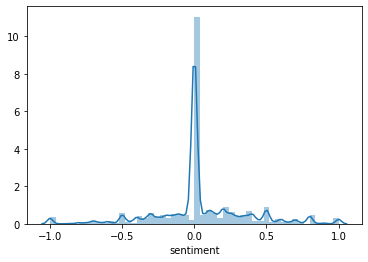

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(data['sentiment']) 

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

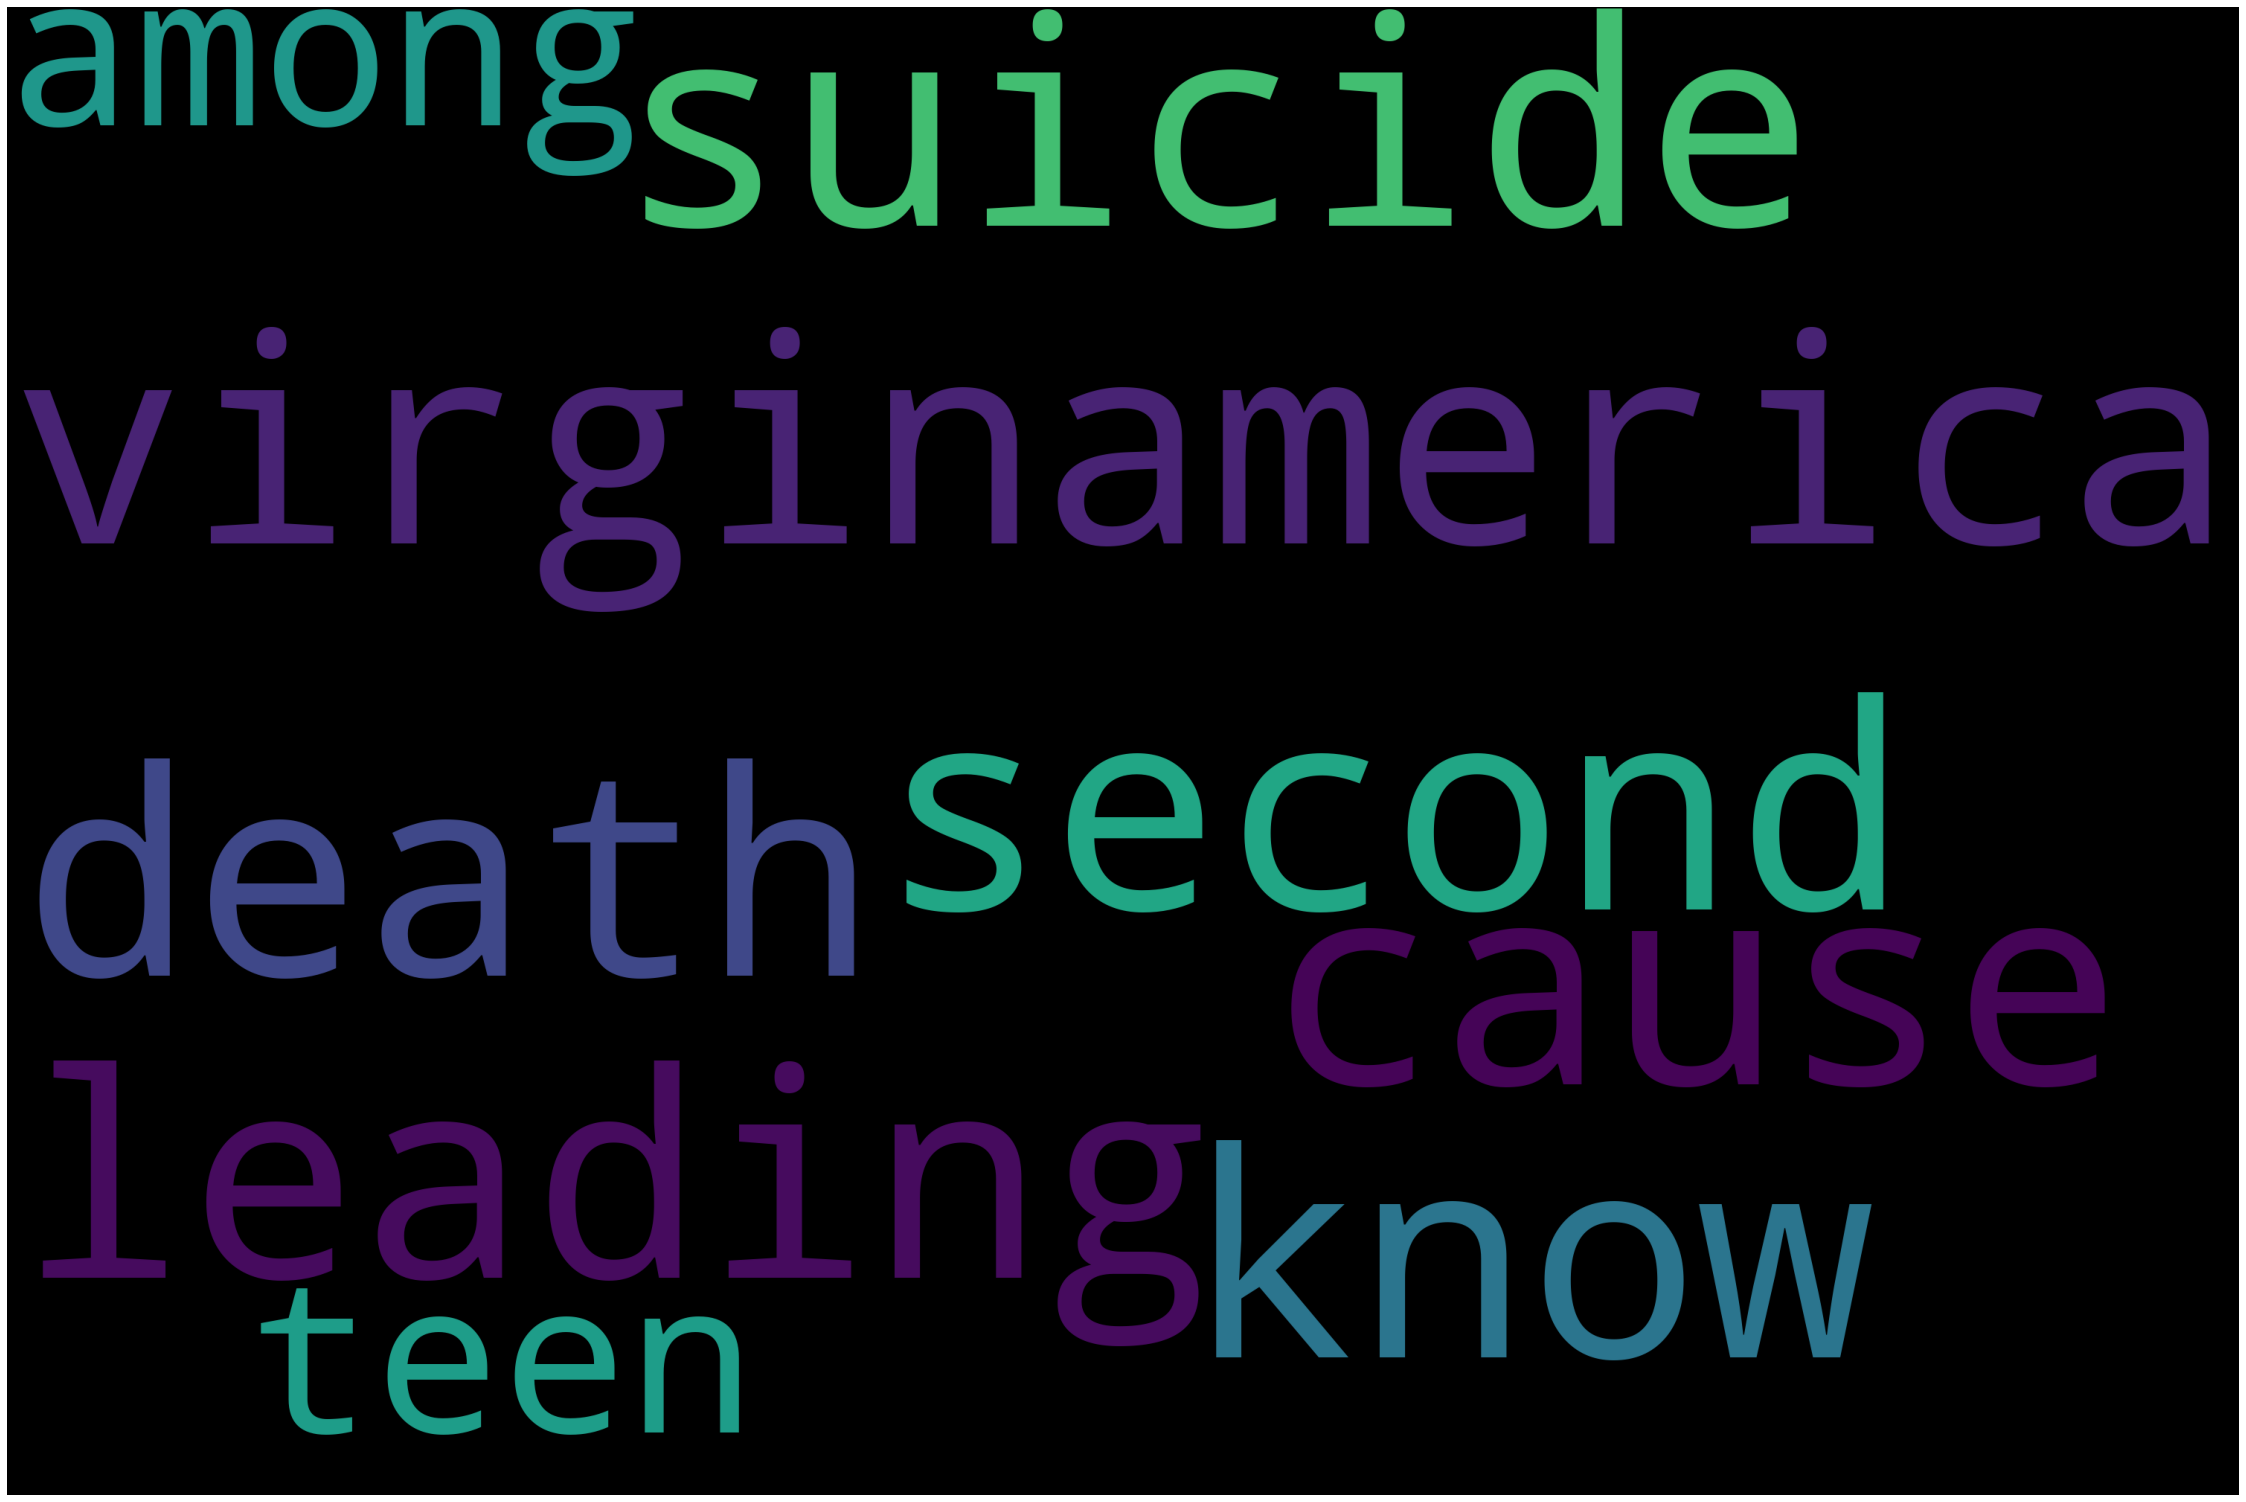

In [54]:
#generate word cloud
text = data.text[10]
# the input of the wordcloud generator
#generate the wordcloud object, set the height and width, set the random_state parameter to ensure
#reproducibility of results and set the stopwords parameter so that the irrelevant words such as pronouns are discarded.
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', collocations=False, stopwords = STOPWORDS).generate(text)
# text is the input to the generate() method
#draw the figure
#Set figure size
plt.figure(figsize=(40, 30))
# Display image
plt.imshow(wordcloud) 
# No axis 
plt.axis("off")
plt.show()